In [42]:

import os
import numpy as np
import pandas as pd
from scipy.misc import imread
import imageio
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# keras imports for the dataset and building our neural network
from keras.models import Sequential,load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils


In [2]:
#Loading the data
data = pd.read_csv("./train_all_data.csv")
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna


In [3]:
#shuffling
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
16926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_19_dha
47854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_36_gya
24582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_23_ba
36542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_2_kha
61762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0


In [4]:
#convert label characters into label 0-int)
data['character_class'] = LabelEncoder().fit_transform(data.character)
data.drop('character', axis=1, inplace=True)
data = data.astype(np.uint8)

In [5]:
data.shape

(78200, 1025)

In [7]:
data.tail()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character_class
76731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
55993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
64814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
42826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
76273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44


In [8]:
X = (data.values[:,:-1]/255.0* 0.99) + 0.01
y = data["character_class"].values
print(X.shape)
print(y.shape)

(78200, 1024)
(78200,)


In [9]:
X_train, X_vald, y_train, y_vald = train_test_split(X, y, test_size=0.2,random_state=1000, stratify=y)
print("X_train shape",X_train.shape)
print("X_vald shape",X_vald.shape)
print("y_train shape",y_train.shape)
print("y_vald shape",y_vald.shape)

X_train shape (62560, 1024)
X_vald shape (15640, 1024)
y_train shape (62560,)
y_vald shape (15640,)


In [10]:

nb_classes = 46

X_train = X_train.astype('float32')
X_vald = X_vald.astype('float32')

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_vald = np_utils.to_categorical(y_vald, nb_classes)

In [25]:
#for input of convolution layer
im_shape = (32, 32, 1)
X_train = X_train.reshape(X_train.shape[0], *im_shape)
X_vald = X_vald.reshape(X_vald.shape[0], *im_shape)

print(X_train.shape)
print(X_vald.shape)

(62560, 32, 32, 1)
(15640, 32, 32, 1)


In [26]:
print("One hot encoding for Y_train: {}".format(Y_train[0, :]))
print("One hot encoding for Y_vald: {}".format(Y_vald[0, :]))

One hot encoding for Y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
One hot encoding for Y_vald: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
print("Shape before one-hot encoding: ", y_train.shape)

print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (62560,)
Shape after one-hot encoding:  (62560, 46)


In [31]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=["accuracy"])

In [33]:
fit_model_cnn = model.fit(X_train, Y_train,
          batch_size=100, epochs=30,
          verbose=2,
          validation_data=(X_vald, Y_vald))

Train on 62560 samples, validate on 15640 samples
Epoch 1/30
 - 335s - loss: 1.4539 - acc: 0.5978 - val_loss: 0.3684 - val_acc: 0.8978
Epoch 2/30
 - 423s - loss: 0.5369 - acc: 0.8398 - val_loss: 0.2317 - val_acc: 0.9347
Epoch 3/30
 - 423s - loss: 0.3752 - acc: 0.8869 - val_loss: 0.1613 - val_acc: 0.9546
Epoch 4/30
 - 420s - loss: 0.2994 - acc: 0.9087 - val_loss: 0.1296 - val_acc: 0.9625
Epoch 5/30
 - 413s - loss: 0.2455 - acc: 0.9252 - val_loss: 0.1105 - val_acc: 0.9667
Epoch 6/30
 - 440s - loss: 0.2103 - acc: 0.9359 - val_loss: 0.0977 - val_acc: 0.9721
Epoch 7/30
 - 447s - loss: 0.1835 - acc: 0.9446 - val_loss: 0.0858 - val_acc: 0.9749
Epoch 8/30
 - 433s - loss: 0.1637 - acc: 0.9498 - val_loss: 0.0803 - val_acc: 0.9762
Epoch 9/30
 - 370s - loss: 0.1487 - acc: 0.9538 - val_loss: 0.0719 - val_acc: 0.9793
Epoch 10/30
 - 367s - loss: 0.1325 - acc: 0.9593 - val_loss: 0.0740 - val_acc: 0.9788
Epoch 11/30
 - 383s - loss: 0.1228 - acc: 0.9618 - val_loss: 0.0683 - val_acc: 0.9793
Epoch 12/30
 

In [34]:
score = model.evaluate(X_vald, Y_vald, verbose=2)

In [35]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0456690086925681
Test accuracy: 0.9876598465473145


In [37]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [38]:
# saving the model
save_dir = "/home/nishan/fuse_training"
model_name = 'model_cnn.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/nishan/fuse_training/model_cnn.h5 


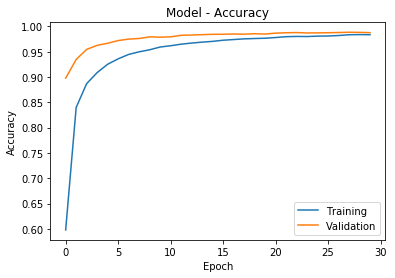

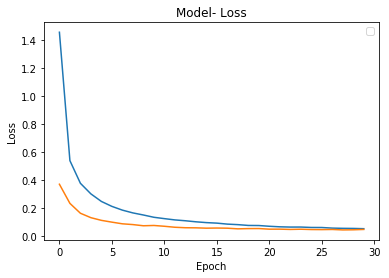

In [40]:
# Accuracy
print(fit_model_cnn)
fig1, ax_acc = plt.subplots()
plt.plot(fit_model_cnn.history['acc'])
plt.plot(fit_model_cnn.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()



# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(fit_model_cnn.history['loss'])
plt.plot(fit_model_cnn.history['val_loss'])
plt.show()



In [43]:
# load the model and create predictions on the test set
our_model = load_model("/home/nishan/fuse_training/model_cnn.h5")
predicted_classes = our_model.predict_classes(X_vald)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_vald)[0]
incorrect_indices = np.nonzero(predicted_classes != y_vald)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


15447  classified correctly
193  classified incorrectly
